In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
N_train = 400
N_test = 100
noise = 50
X_train = np.random.randint(low=200,high=2000,size=N_train)
X_test = np.random.randint(low=200,high=2000,size=N_test)

Y_train = 0.5*X_train + noise*np.random.randn(N_train)*1.5*X_train/np.mean(X_train)+5e1
Y_test = 0.5*X_test + 1e-4*X_test**2 + noise*np.random.randn(N_test)*1.5*X_test/np.mean(X_test)+5e1

In [72]:
for i in range(10):
    print "Square feet = {}, House price = {}".format(X_train[i],Y_train[i])

Square feet = 1131, House price = 452.010876711
Square feet = 923, House price = 444.895433676
Square feet = 1691, House price = 1218.32962412
Square feet = 1977, House price = 1291.57395383
Square feet = 1702, House price = 844.877770118
Square feet = 1997, House price = 1078.2702746
Square feet = 1062, House price = 506.439752383
Square feet = 342, House price = 230.731317248
Square feet = 1975, House price = 1147.002566
Square feet = 1640, House price = 696.588498446


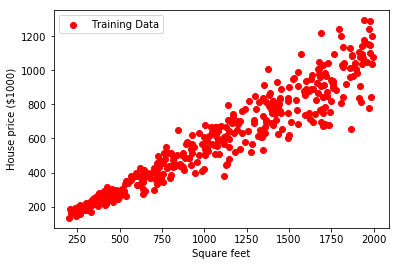

In [76]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.xlabel('Square feet')
plt.ylabel('House price ($1000)')
plt.legend(loc='upper left')
plt.show()

In [77]:
std = np.std(X_train)
mu = np.mean(X_train)
X_train = (X_train-mu)/std
X_test = (X_test-mu)/std

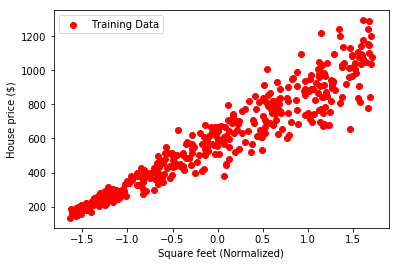

In [78]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.xlabel('Square feet (Normalized)')
plt.ylabel('House price ($)')
plt.legend(loc='upper left')
plt.show()

In [83]:
Yhat_1 = 350*X_train + 600
Yhat_2 = 300*X_train + 600
Yhat_3 = 200*X_train + 600

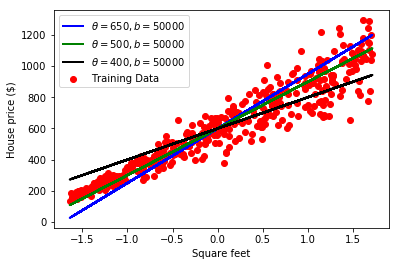

In [84]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.plot(X_train,Yhat_1, color='b',linewidth=2, label=r'$\theta=650, b=50000$')
plt.plot(X_train,Yhat_2, color='g',linewidth=2, label=r'$\theta=500, b=50000$')
plt.plot(X_train,Yhat_3, color='k',linewidth=2, label=r'$\theta=400, b=50000$')
plt.xlabel('Square feet')
plt.ylabel('House price ($)')
plt.legend(loc='upper left')
plt.show()

In [85]:
def MSE(Y,Yhat):
    return np.mean((Y-Yhat)**2)

In [86]:
print "Error for theta=650, b=50000 is: {}".format(MSE(Y_train,Yhat_1))
print "Error for theta=500, b=50000 is: {}".format(MSE(Y_train,Yhat_2))
print "Error for theta=400, b=50000 is: {}".format(MSE(Y_train,Yhat_3))


Error for theta=650, b=50000 is: 13459.9951725
Error for theta=500, b=50000 is: 8319.32240744
Error for theta=400, b=50000 is: 13037.9768773


In [87]:
def gradient(x,y,theta,b):
    yhat = theta*x+b
    return -2*np.mean((y-yhat)*x)

In [104]:
learning_rate = 2e-2
N_iterations = 100
Theta = 1.0
b = 600
print_every = 10
train_loss = []
test_loss = []
iters = []
thetas = []
for i in range(N_iterations):
        g = gradient(X_train,Y_train,Theta,b)
        Theta = Theta-learning_rate*g
        if (i+1)%print_every == 0:
            Yhat = Theta*X_train+b
            e = MSE(Y_train,Yhat)
            train_loss.append(e)
            
            Yhat_test = Theta*X_test+b
            e_test = MSE(Y_test,Yhat_test)
            test_loss.append(e_test)
            
            iters.append(i)
            thetas.append(Theta)
            print "Iteration {}: Theta={}, MSE_train = {}, MSE_test = {}".format(i,Theta,e,e_test)

Iteration 9: Theta=92.3643685397, MSE_train = 40465.9227182, MSE_test = 101053.040774
Iteration 19: Theta=153.106382512, MSE_train = 22139.0977649, MSE_test = 70366.2503003
Iteration 29: Theta=193.489655776, MSE_train = 14038.5965303, MSE_test = 54208.1336591
Iteration 39: Theta=220.33777379, MSE_train = 10458.1552689, MSE_test = 45341.3114243
Iteration 49: Theta=238.187278861, MSE_train = 8875.59151707, MSE_test = 40275.3876918
Iteration 59: Theta=250.054212369, MSE_train = 8176.09448697, MSE_test = 37273.8291282
Iteration 69: Theta=257.943737054, MSE_train = 7866.91509718, MSE_test = 35440.2592546
Iteration 79: Theta=263.188950546, MSE_train = 7730.25705438, MSE_test = 34292.8307409
Iteration 89: Theta=266.676139659, MSE_train = 7669.85386686, MSE_test = 33561.6251436
Iteration 99: Theta=268.994536789, MSE_train = 7643.15551096, MSE_test = 33089.481784


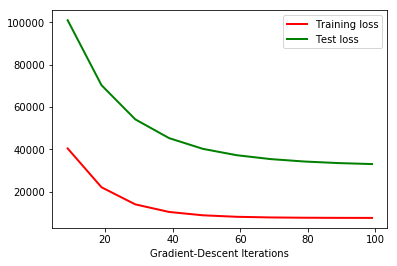

In [105]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
plt.plot(iters,test_loss, linewidth=2, color='g', label='Test loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

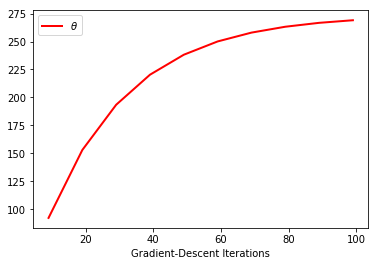

In [106]:
plt.plot(iters,thetas,linewidth=2,color='r',label=r'$\theta$')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

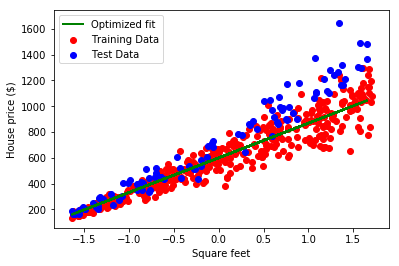

In [107]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X_test,Yhat_test, color='g', linewidth=2, label=r'Optimized fit')
plt.xlabel('Square feet')
plt.ylabel('House price ($)')
plt.legend(loc='upper left')
plt.show()